#### 1) Loading the dataset into Python environment:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



In [2]:

df = pd.read_csv(r"C:\Users\jubie\Downloads\titanic_dataset (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# information about dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#to find missing values
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2) Pre-processing steps:


In [8]:
## Handle missing values
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [9]:
df.isnull().sum()# clean data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# display the rows having the same Ticket 
df[df.duplicated(subset='Ticket')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,B96 B98,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,B96 B98,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,B96 B98,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,B96 B98,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,B96 B98,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B96 B98,Q


In [13]:
# count the number of tickets having ticket = 'LINE'
df.loc[df.Ticket == 'LINE'].groupby('Ticket').agg({'Ticket' : ['count']}) 

,Ticket
,count
Ticket,
LINE,4


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'Boxplot of Pclass column')

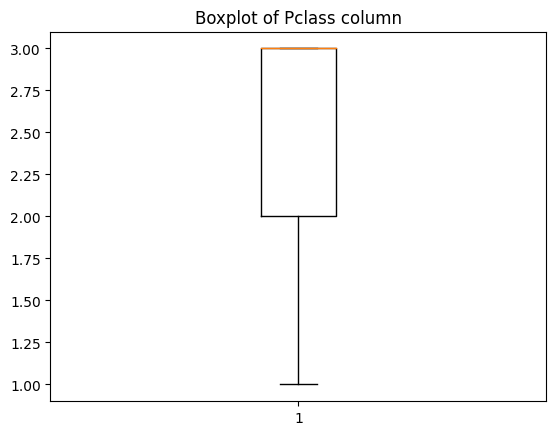

In [15]:
###Checking outliers 
plt.boxplot(df['Pclass'])
plt.title('Boxplot of Pclass column') # outliers

Text(0.5, 1.0, 'Boxplot of Age column')

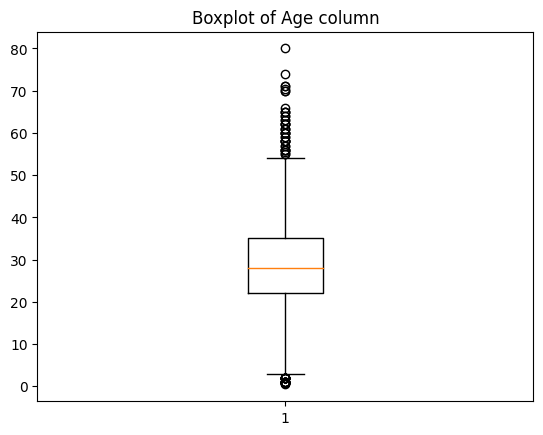

In [16]:
plt.boxplot(df['Age']) 
plt.title('Boxplot of Age column') #outliers are present

Text(0.5, 1.0, 'Boxplot of SibSp Column')

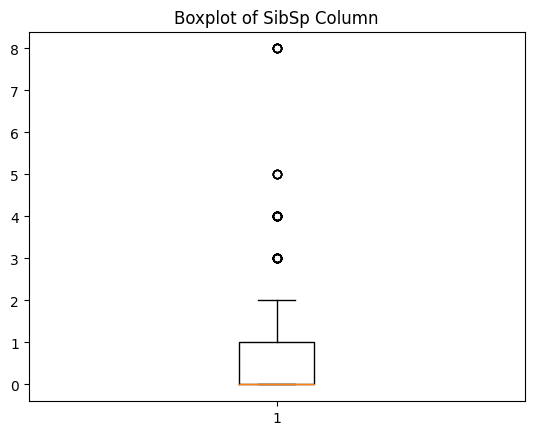

In [17]:
plt.boxplot(df['SibSp'])
plt.title('Boxplot of SibSp Column') # outliers are present

Text(0.5, 1.0, 'Boxplot of Fare Column')

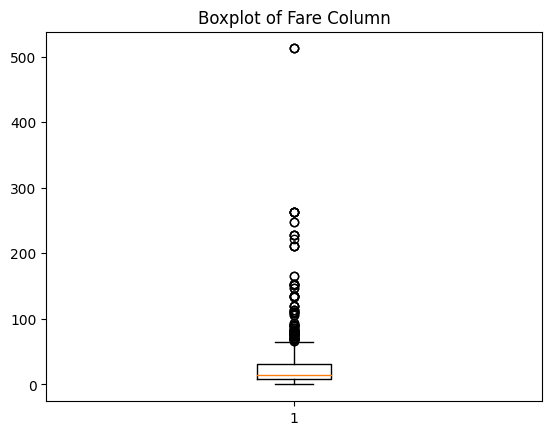

In [18]:
plt.boxplot(df['Fare'])
plt.title('Boxplot of Fare Column') #outliers are present/

In [19]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')

C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\3016513975.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['Age'],25,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\3016513975.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['Age'],50,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\3016513975.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

In [20]:
print('\n' ,Q1,'\n',Q2,'\n',Q3)
IQR=Q3-Q1
IQR
upper_Limit=Q3+1.5*IQR
lower_Limit=Q1-1.5*IQR
print(upper_Limit)
print(lower_Limit)


 22.0 
 28.0 
 35.0
54.5
2.5


In [21]:
outlier=[]
for x in df['Age']:
  if((x>upper_Limit) or (x<lower_Limit)):
    outlier.append(x)
index_out=df['Age']>upper_Limit #removing outlier

In [22]:
df.loc[index_out].index
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [23]:
Q1=np.percentile(df['Pclass'],25,interpolation='midpoint')
Q2=np.percentile(df['Pclass'],50,interpolation='midpoint')
Q3=np.percentile(df['Pclass'],75,interpolation='midpoint')

C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\1426412820.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['Pclass'],25,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\1426412820.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['Pclass'],50,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\1426412820.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [24]:
print('\n' ,Q1,'\n',Q2,'\n',Q3)
IQR=Q3-Q1
print(Q3-Q1)
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)


 2.0 
 3.0 
 3.0
1.0
4.5
0.5


In [25]:
outlier=[]
for x in df['Pclass']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

index_out=df['Pclass']>upper_limit #removing outliers
    

In [26]:
df.loc[index_out].index

Int64Index([], dtype='int64')

In [27]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')

C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\2369619186.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\2369619186.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
C:\Users\jubie\AppData\Local\Temp\ipykernel_6444\2369619186.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mid

In [28]:
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
print(Q3-Q1)
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

7.9104
14.4542
31.0
23.0896
65.6344
-26.724


In [29]:
outlier=[]
for x in df['Fare']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
    
index_out=df['Fare']>upper_limit #removing outliers
df.loc[index_out].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [30]:
## encode categorical variables
df=pd.get_dummies(df)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
### MinMax Scaling

#creating an instance of minmaxscaler
minmax= MinMaxScaler(feature_range=(0,1))
df1=minmax.fit_transform(df)
df1

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [33]:
#converting back ointo data
df1=pd.DataFrame(df)

In [34]:
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 3) Create kNN and SVM models

In [35]:
# Split data into features and target
X = df1.drop('Survived', axis=1)
y = df1['Survived']


In [36]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [37]:
##knn


metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(X_train,y_train)
    knn_pred  =  knn_model.predict(X_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)


In [38]:
metric_k

[0.600896860986547,
 0.6412556053811659,
 0.6547085201793722,
 0.6591928251121076,
 0.6547085201793722,
 0.6547085201793722,
 0.6591928251121076,
 0.6547085201793722,
 0.6412556053811659,
 0.6457399103139013,
 0.6502242152466368,
 0.6591928251121076]

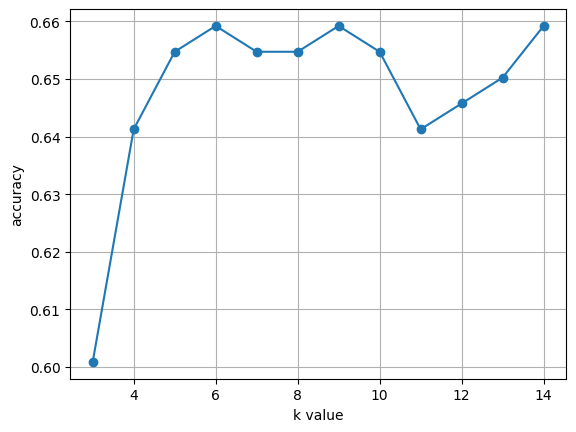

In [39]:
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


In [40]:
knn_6      =  KNeighborsClassifier(n_neighbors = 6)
knn_model_6 =  knn_6.fit(X_train,y_train)
knn_pred_6  =  knn_model_6.predict(X_test)
knn_pred_6

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [41]:
knn_12      =  KNeighborsClassifier(n_neighbors = 12)
knn_model_12=  knn_12.fit(X_train,y_train)
knn_pred_12  =  knn_model_12.predict(X_test)
knn_pred_12

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
print(confusion_matrix(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))

[[126   8]
 [ 68  21]]
0.6591928251121076


In [43]:
### SVM Model

svm_clf1= SVC(kernel='linear')
svm_model1=svm_clf1.fit(X_train,y_train)
y_pred_svm1=svm_model1.predict(X_test)

In [45]:
print(confusion_matrix(y_test,y_pred_svm1))
print(accuracy_score(y_test, y_pred_svm1))      


[[119  15]
 [ 23  66]]
0.8295964125560538


In [46]:
#Svm-kernal-rbf
svm_clf2= SVC(kernel='rbf')
svm_model2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_model2.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_pred_svm2))
print(accuracy_score(y_test, y_pred_svm2))      


[[130   4]
 [ 83   6]]
0.6098654708520179


In [50]:
### SVM-kernal -poly

svm_clf3= SVC(kernel='poly')
svm_model3=svm_clf3.fit(X_train,y_train)
y_pred_svm3=svm_model3.predict(X_test)

In [51]:
print(confusion_matrix(y_test,y_pred_svm3))
print(accuracy_score(y_test, y_pred_svm3))      


[[131   3]
 [ 82   7]]
0.6188340807174888


### 4) Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models


#### 1) k-fold cross validation

In [52]:
# specifying number of folds as 3
kfold_validator= KFold(3) 


In [53]:
# using kfold_validator for splitting X and y, checking which all index are given for training and testing
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)
    print("\n\n")


Training Index: [297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 53

### knn

In [54]:

# create empty list
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy
    cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
    
    # display k value
    print(f"k:{k}")
    
    # accuracy for each fold
    print(f"\n Accuracy of each fold : {cv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(cv_knnresult)
    print(f"\n Mean = {mean}\n\n\n")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)


k:3

 Accuracy of each fold : [0.35690236 0.67340067 0.69360269]

 Mean = 0.5746352413019079



k:4

 Accuracy of each fold : [0.37710438 0.62962963 0.68013468]

 Mean = 0.5622895622895623



k:5

 Accuracy of each fold : [0.36026936 0.62626263 0.7003367 ]

 Mean = 0.5622895622895623



k:6

 Accuracy of each fold : [0.37037037 0.61616162 0.7003367 ]

 Mean = 0.5622895622895623



k:7

 Accuracy of each fold : [0.36026936 0.66329966 0.70707071]

 Mean = 0.5768799102132435



k:8

 Accuracy of each fold : [0.59259259 0.64983165 0.69360269]

 Mean = 0.6453423120089786



k:9

 Accuracy of each fold : [0.57239057 0.66666667 0.7003367 ]

 Mean = 0.6464646464646465



k:10

 Accuracy of each fold : [0.64646465 0.64983165 0.68686869]

 Mean = 0.6610549943883277



k:11

 Accuracy of each fold : [0.55892256 0.64646465 0.69023569]

 Mean = 0.6318742985409652



k:12

 Accuracy of each fold : [0.64983165 0.63973064 0.68013468]

 Mean = 0.6565656565656566



k:13

 Accuracy of each fold : [0.491

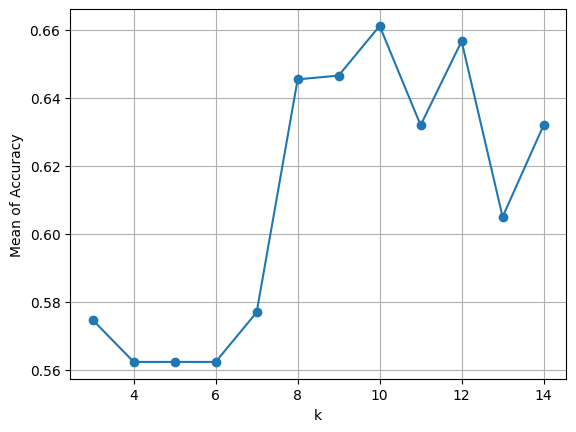

In [55]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-') 

# display label on x-axis
plt.xlabel('k')

# display label on y-axis
plt.ylabel('Mean of Accuracy')

# display grid
plt.grid()

In [56]:
# creating an instance using k = 12
knn = KNeighborsClassifier(n_neighbors=12) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy and display it
cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
cv_knnresult

array([0.64983165, 0.63973064, 0.68013468])

In [57]:
# display mean of accuracy
np.mean(cv_knnresult)

0.6565656565656566

### SVM

In [62]:
##linear
# calculate accuracy and display it
cv_svmlinresult = cross_val_score(svm_model1, X, y, cv=kfold_validator)
cv_svmlinresult

# display mean of accuracy
np.mean(cv_svmlinresult)

0.8148148148148149

In [63]:
#### Rbf
# calculate accuracy and display it
cv_svmrbfresult = cross_val_score(svm_model2, X, y, cv=kfold_validator)
cv_svmrbfresult

# display mean of accuracy
np.mean(cv_svmrbfresult)

0.6307519640852974

In [64]:
### poly
# calculate accuracy and display it
cv_svmpolresult = cross_val_score(svm_model3, X, y, cv=kfold_validator)
cv_svmpolresult

# display mean of accuracy
np.mean(cv_svmpolresult)


0.6386083052749719

#### 2) stratified cross validation

### knn

In [65]:
# specifying number of splits as 3
skfold_validator = StratifiedKFold(n_splits=3)

In [66]:
# using skfold_validator for splitting X and y, checking which all index are given for training and testing
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)
    print("\n\n")

Training Index: [284 285 287 292 293 294 295 296 297 302 304 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 53

In [67]:
# create empty list 
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy 
    skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)
    
    # display k value
    print(f"k:{k}")
    
    # accuracy of each fold
    print(f"\n Accuracy of each fold : {skcv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(skcv_knnresult)
    print(f"\n Mean = {mean}\n\n")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)


k:3

 Accuracy of each fold : [0.65993266 0.41077441 0.63973064]

 Mean = 0.5701459034792368


k:4

 Accuracy of each fold : [0.64983165 0.41414141 0.63636364]

 Mean = 0.5667789001122334


k:5

 Accuracy of each fold : [0.65319865 0.40740741 0.63973064]

 Mean = 0.5667789001122334


k:6

 Accuracy of each fold : [0.64646465 0.41414141 0.63636364]

 Mean = 0.5656565656565656


k:7

 Accuracy of each fold : [0.64983165 0.41414141 0.63636364]

 Mean = 0.5667789001122334


k:8

 Accuracy of each fold : [0.64309764 0.41077441 0.63299663]

 Mean = 0.5622895622895623


k:9

 Accuracy of each fold : [0.64646465 0.41077441 0.63973064]

 Mean = 0.5656565656565656


k:10

 Accuracy of each fold : [0.64646465 0.41077441 0.62626263]

 Mean = 0.5611672278338945


k:11

 Accuracy of each fold : [0.64646465 0.4040404  0.62962963]

 Mean = 0.5600448933782268


k:12

 Accuracy of each fold : [0.64646465 0.41414141 0.62626263]

 Mean = 0.5622895622895623


k:13

 Accuracy of each fold : [0.64646465 0.40

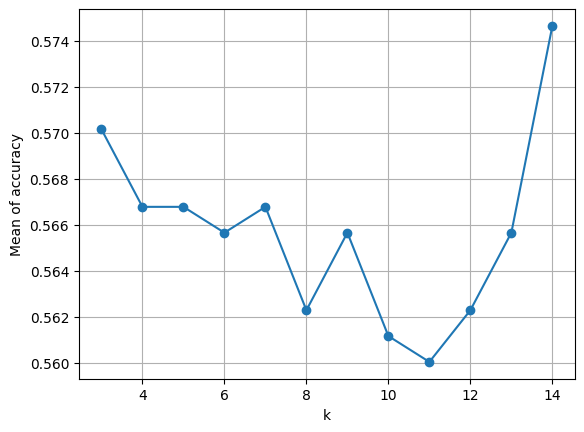

In [68]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-')

# display label on the x-axis
plt.xlabel('k')

# display label on the y-axis
plt.ylabel('Mean of accuracy')

# display grid
plt.grid()


In [69]:
# creating an instance using k = 12
knn = KNeighborsClassifier(n_neighbors=12) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy 
skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)

In [70]:
# display mean of accuracy
np.mean(skcv_knnresult)

0.5622895622895623

### svm

In [71]:
### linear
# calculate accuracy and display it
skcv_svmlinresult = cross_val_score(svm_model1, X, y, cv=skfold_validator)
skcv_svmlinresult

# display mean of accuracy
np.mean(skcv_svmlinresult)


0.819304152637486

In [72]:
### rbf

# calculate accuracy and display it
skcv_svmrbfresult = cross_val_score(svm_model2, X, y, cv=skfold_validator)
skcv_svmrbfresult
# display mean of accuracy
np.mean(skcv_svmrbfresult)

0.6341189674523008

In [73]:
### poly
# calculate accuracy and display it
skcv_svmpolresult = cross_val_score(svm_model3, X, y, cv=skfold_validator)
skcv_svmpolresult

# display mean of accuracy
np.mean(skcv_svmpolresult)


0.6430976430976431

##### Accuracy of different Models
      1) K-NN    :* k-fold cross validation- 0.6565656565656566
                  * stratified cross validation- 0.5622895622895623
       
      2) SVM     : * k-fold cross validation -
                   a)linear:0.8148148148148149
                   b)rbf:0.6307519640852974
                   c)poly:0.6386083052749719

                   * stratified cross validation-
                   a)linear:0.819304152637486

                   b)rbf:0.6341189674523008

                   c)poly:0.6430976430976431